<a href="https://colab.research.google.com/github/jsankhla67/Traffic_flow_prediction_model/blob/main/Traffic_Flow_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/TrafficTwoMonth.csv')

## Pre Processing the Dataset



In [ ]:
# Display information about the DataFrame
print("\nInformation about the DataFrame:")
print(df.info())

# Display 5 rows of the DataFrame
print(df.head())


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB
None
          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        13          2         2   
1  12:15:00 AM    10         Tuesday        14          1         1   
2  12:30:00 AM    10         Tuesday        10          2         2   
3 

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Traffic Situation'])  # Features
X_encoded = pd.get_dummies(X, columns=['Time', 'Day of the week'])
y = df['Traffic Situation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


## Visualization

In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualize confusion matrix for each model
def plot_confusion_matrix(model_name, y_true, y_pred):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Visualize classification report for each model
def plot_classification_report(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    sns.heatmap(df.iloc[:-1, :].T, annot=True, cmap='viridis')
    plt.title(f'Classification Report - {model_name}')
    plt.show()

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Splitting features and target variable
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']

# Convert 'Time' column to hour and minute features
X['Hour'] = pd.to_datetime(X['Time']).dt.hour
X['Minute'] = pd.to_datetime(X['Time']).dt.minute
X.drop('Time', axis=1, inplace=True)

# Convert 'Day of the week' to one-hot encoding
X = pd.get_dummies(X, columns=['Day of the week'])

# One-hot encode the target variable
y = pd.get_dummies(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predict on the test set
lr_y_test_pred = linear_model.predict(X_test)

# Calculate mean squared error
test_mse = mean_squared_error(y_test, lr_y_test_pred)

print("Test MSE:", test_mse)

# Calculate R-squared score
test_r2 = r2_score(y_test, lr_y_test_pred)

print("Test R-squared:", test_r2)

Test MSE: 0.08846851077697523
Test R-squared: 0.3360069332958633


<ipython-input-7-fe5ec3aac606>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['Hour'] = pd.to_datetime(X['Time']).dt.hour
<ipython-input-7-fe5ec3aac606>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['Minute'] = pd.to_datetime(X['Time']).dt.minute


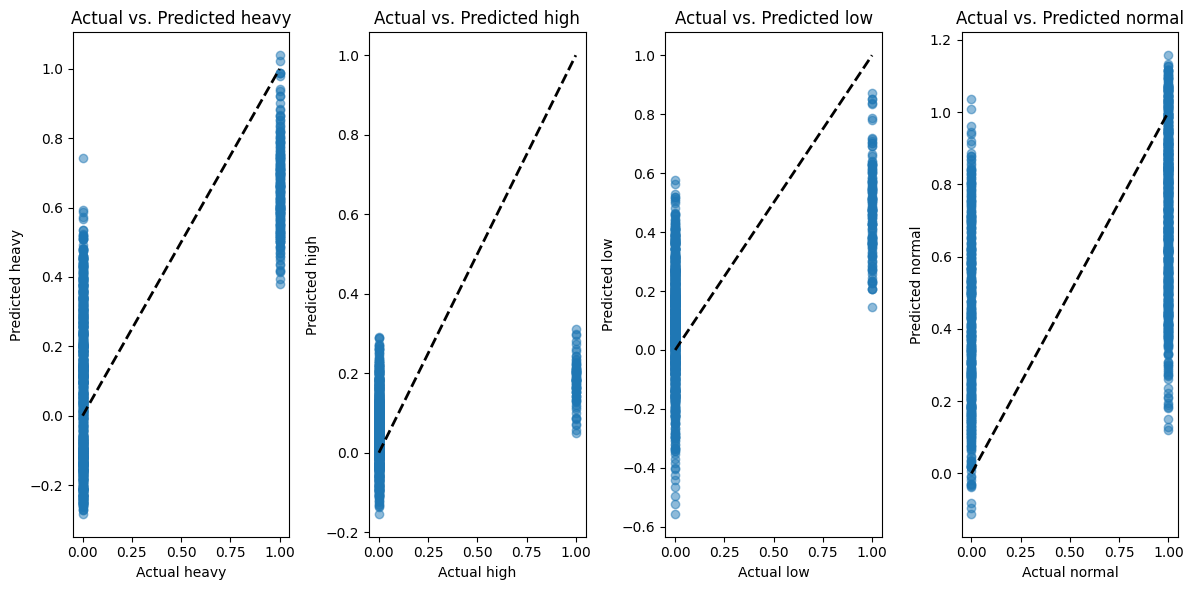

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values for each target variable
plt.figure(figsize=(12, 6))
for i, target_column in enumerate(y.columns):
    plt.subplot(1, y.shape[1], i + 1)
    plt.scatter(y_test[target_column], lr_y_test_pred[:, i], alpha=0.5)
    plt.plot([y_test[target_column].min(), y_test[target_column].max()],
             [y_test[target_column].min(), y_test[target_column].max()], 'k--', lw=2)
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Actual vs. Predicted ' + target_column)
plt.tight_layout()
plt.show()


## Decision Trees

In [ ]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict on the training and test sets
dt_y_test_pred = tree_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_y_test_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9974811083123426


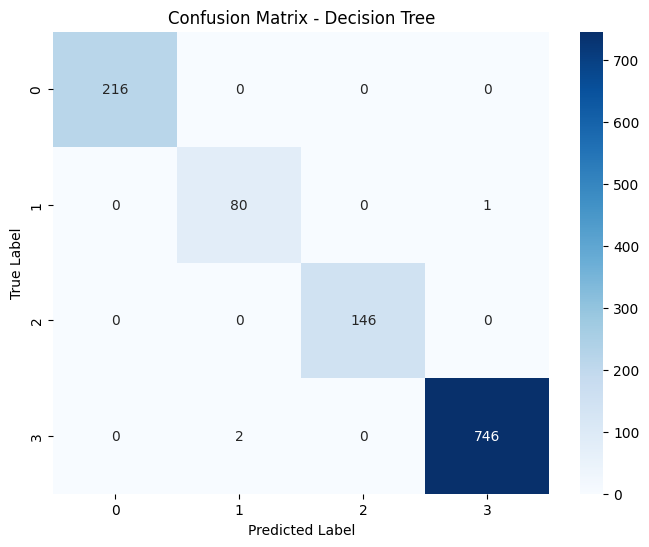

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, dt_y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


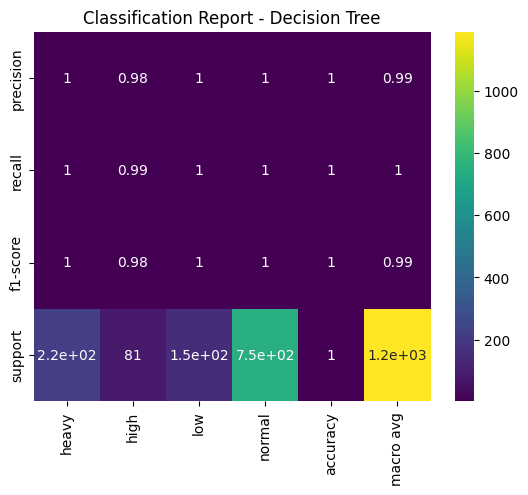

In [ ]:
plot_classification_report('Decision Tree', y_test, dt_y_test_pred)

## Random Forest

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable on the testing data
rf_y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9941225860621327


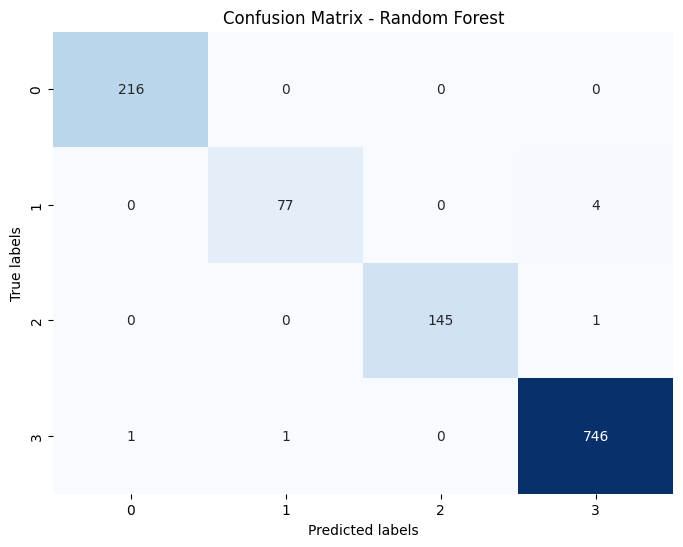

In [ ]:
plot_confusion_matrix('Random Forest', y_test, rf_y_pred)

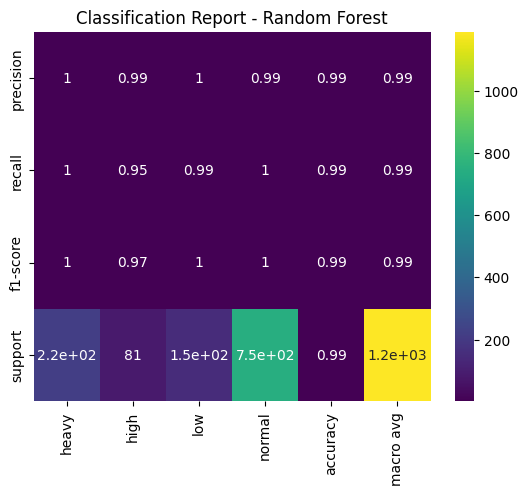

In [ ]:
plot_classification_report('Random Forest', y_test, rf_y_pred)

## XG Boost

In [ ]:
# Importing necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Traffic Situation'])  # Features
X_encoded = pd.get_dummies(X, columns=['Time', 'Day of the week'])
y = df['Traffic Situation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Initialize LabelEncoder
label_encoder = LabelEncoder()

xgb_model = xgb.XGBClassifier()

# Fit and transform the target classes for both train and test sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now train the XGBoost model with the encoded target classes
xgb_model.fit(X_train, y_train_encoded)

# Predict on the training and test sets
xgb_y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, xgb_y_test_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9991603694374476


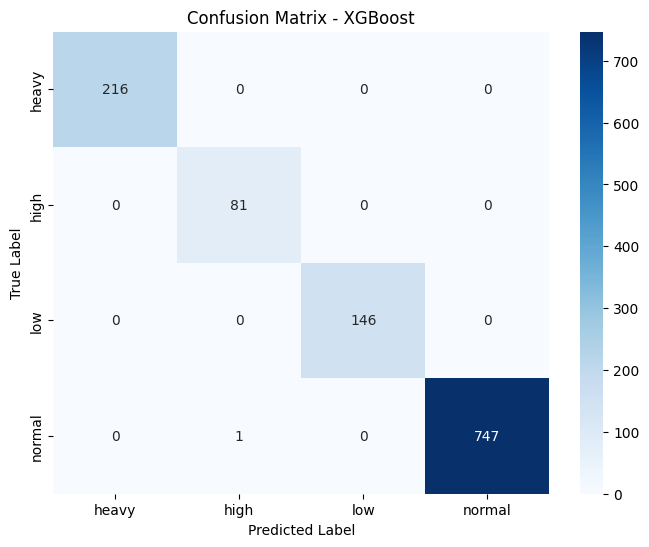

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the encoded predicted labels back to their original categorical form
xgb_y_test_pred_str = label_encoder.inverse_transform(xgb_y_test_pred)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_y_test_pred_str)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Convert the encoded predicted labels back to their original categorical form
xgb_y_test_pred_str = label_encoder.inverse_transform(xgb_y_test_pred)

# Plot classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_y_test_pred_str))


Classification Report for XGBoost:
              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       216
        high       0.99      1.00      0.99        81
         low       1.00      1.00      1.00       146
      normal       1.00      1.00      1.00       748

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191

